<a href="https://colab.research.google.com/github/Sophiya307/new/blob/main/Lung_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import cv2,math,os,glob
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
from keras import layers
from keras.layers import Input, Dense, Activation , ZeroPadding2D , BatchNormalization , Flatten,Conv2D
from keras.layers import MaxPooling2D,Dropout,GlobalMaxPool2D,AveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils.vis_utils import model_to_dot

Listout the files in the input directory

In [ ]:
!wget https://drive.google.com/drive/folders/10Vc1Zr7UquQmp2t9I7yWNYpvj9x4ag0X?usp=sharing

--2023-07-13 14:11:01--  https://drive.google.com/drive/folders/10Vc1Zr7UquQmp2t9I7yWNYpvj9x4ag0X?usp=sharing
Resolving drive.google.com (drive.google.com)... 74.125.20.139, 74.125.20.102, 74.125.20.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.20.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘10Vc1Zr7UquQmp2t9I7yWNYpvj9x4ag0X?usp=sharing’

10Vc1Zr7UquQmp2t9I7     [ <=>                ] 252.74K  --.-KB/s    in 0.1s    

2023-07-13 14:11:02 (1.74 MB/s) - ‘10Vc1Zr7UquQmp2t9I7yWNYpvj9x4ag0X?usp=sharing’ saved [258807]



In [ ]:
!unzip Data.zip

unzip:  cannot find or open Data.zip, Data.zip.zip or Data.zip.ZIP.


In [ ]:
print(os.listdir("/content/drive/MyDrive/Data"))

['valid', 'test', 'train']


In [ ]:
print(os.listdir("/content/drive/MyDrive/Data/train"))

['SquamousCellCarcinoma', 'Normal', 'LargeCellCarcinoma', 'Adenocarcinoma']


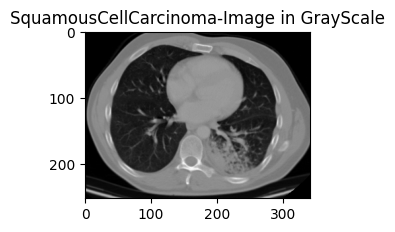

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


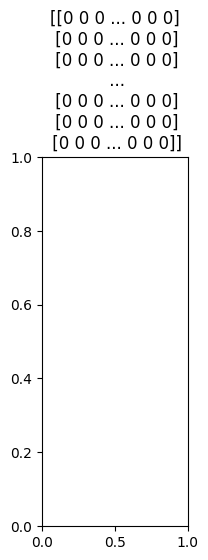

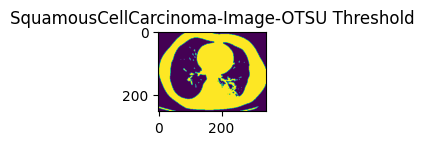

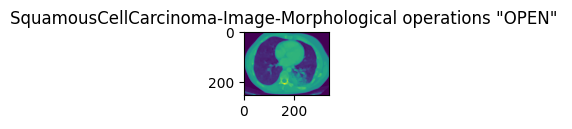

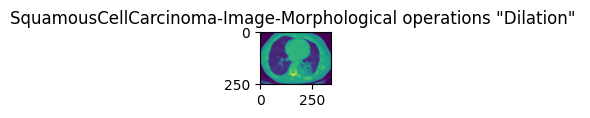

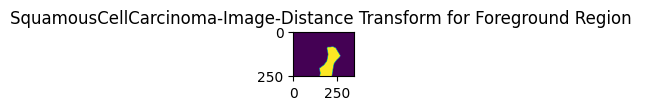

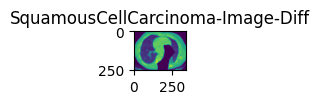

In [ ]:
kernel_matrix=np.ones((3,3),np.uint8)
plt.show()
inp_image = cv2.imread('/content/drive/MyDrive/Data/train/SquamousCellCarcinoma/000002 (4).png')
#gray scale
img_gray=cv2.cvtColor(inp_image,cv2.COLOR_BGR2GRAY)
plt.subplot(122)
plt.title('SquamousCellCarcinoma-Image in GrayScale')
plt.imshow(img_gray,cmap='gray')
plt.show()

#applying gaussian blur to the image
gauss_blur=cv2.GaussianBlur(img_gray,(5,5),0)
plt.subplot(133)
plt.title(gauss_blur)
plt.show()

#Otsu threshold (scaling to 0-255 range)
ret_val ,thresholdd=cv2.threshold(img_gray,0,255,cv2.THRESH_OTSU)
plt.subplot(144)
plt.title('SquamousCellCarcinoma-Image-OTSU Threshold')
plt.imshow(thresholdd)
plt.show()

#erosion followed by dilation
morph_open=cv2.morphologyEx(img_gray ,cv2.MORPH_OPEN,kernel_matrix,iterations=2)
plt.subplot(155)
plt.title('SquamousCellCarcinoma-Image-Morphological operations "OPEN" ')
plt.imshow(morph_open)
plt.show()

#dilation
morph_dilate = cv2.dilate(morph_open,kernel_matrix,iterations=2)
plt.subplot(166)
plt.title('SquamousCellCarcinoma-Image-Morphological operations "Dilation" ')
plt.imshow(morph_dilate)
plt.show()
forgr_trans=cv2.distanceTransform(morph_open,cv2.DIST_L2,5)
retvall_1,thresholdd_forg1=cv2.threshold(forgr_trans,0.7*forgr_trans.max(),255,0)
thresholdd_forg=np.uint8(thresholdd_forg1)
plt.subplot(177)
plt.title('SquamousCellCarcinoma-Image-Distance Transform for Foreground Region ')
plt.imshow(np.uint8(thresholdd_forg))
plt.show()

Difference_Image=cv2.subtract(morph_dilate,thresholdd_forg)
plt.subplot(188)
plt.title('SquamousCellCarcinoma-Image-Diff')
plt.imshow(Difference_Image)
plt.show()





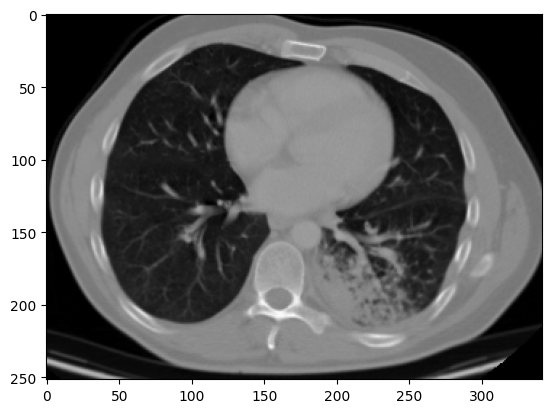

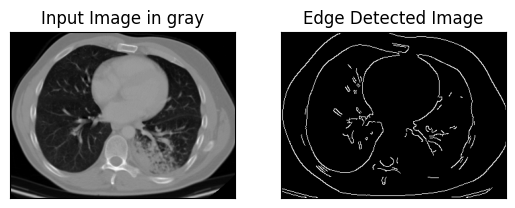

In [ ]:
#marker labelling
ret, marked_region =cv2.connectedComponents(morph_dilate)

#background is not 0,but 1
marked_region= marked_region+1
#now, mark region of empty background as0

marked_region[Difference_Image==255]=0
#plt.imshow(marked_region)
#plt.show()
marked_region=cv2.watershed(inp_image, marked_region)
inp_image[marked_region == -1] ==[255,0,0]
plt.imshow(inp_image)
plt.show()
#sobel edge detection
img_edge=cv2.Canny(inp_image,200,300)
plt.subplot(121),plt.imshow(img_gray,cmap='gray' )
plt.title('Input Image in gray'),plt.xticks([]) ,plt.yticks([])

#colormap -gray
plt.subplot(122),plt.imshow(img_edge,cmap='gray')
plt.title('Edge Detected Image') ,plt.xticks([]),plt.yticks([])
plt.show()


Reading Image to get the values in pixels=product of(width x height x channels)

In [ ]:
 img_data =[]
 predict_labels =[]
 img_ext =['png']

In [ ]:
#for AdenoCarcinoma
files_name=[]
image_dir = '/content/drive/MyDrive/Data/train/Adenocarcinoma/'
[files_name.extend(glob.glob(image_dir + '*.' + e)) for e in img_ext]
display(files_name)

img_data.extend([cv2.imread(file) for file in files_name])
display(img_data)
predict_labels.extend(["AdenoCarcinoma" for file in files_name])
display(predict_labels)

['/content/drive/MyDrive/Data/train/Adenocarcinoma/000022 (2).png',
 '/content/drive/MyDrive/Data/train/Adenocarcinoma/000066 (9).png',
 '/content/drive/MyDrive/Data/train/Adenocarcinoma/000029 (9).png',
 '/content/drive/MyDrive/Data/train/Adenocarcinoma/000080 (10).png',
 '/content/drive/MyDrive/Data/train/Adenocarcinoma/000029 (4).png',
 '/content/drive/MyDrive/Data/train/Adenocarcinoma/000091 (3).png',
 '/content/drive/MyDrive/Data/train/Adenocarcinoma/000023 (5).png',
 '/content/drive/MyDrive/Data/train/Adenocarcinoma/000021 (8).png',
 '/content/drive/MyDrive/Data/train/Adenocarcinoma/000085 (4).png',
 '/content/drive/MyDrive/Data/train/Adenocarcinoma/000078 (6).png',
 '/content/drive/MyDrive/Data/train/Adenocarcinoma/000035 (5).png',
 '/content/drive/MyDrive/Data/train/Adenocarcinoma/000044 (9).png',
 '/content/drive/MyDrive/Data/train/Adenocarcinoma/000036 (6).png',
 '/content/drive/MyDrive/Data/train/Adenocarcinoma/000025 (6).png',
 '/content/drive/MyDrive/Data/train/Adenocarcin

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [2, 2, 2]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [2, 2, 2]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[1, 1, 1],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

['AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarci

# New Section

In [ ]:
#for LargeCellCarcinoma
files_name=[]
image_dir ='/content/drive/MyDrive/Data/train/LargeCellCarcinoma/'
[files_name.extend(glob.glob(image_dir + '*.' + e)) for e in img_ext]
display(files_name)

img_data.extend([cv2.imread(file) for file in files_name])
display(img_data)
predict_labels.extend(["LargeCellCarcinoma" for file in files_name])
display(predict_labels)


['/content/drive/MyDrive/Data/train/LargeCellCarcinoma/000172.png',
 '/content/drive/MyDrive/Data/train/LargeCellCarcinoma/000093 (4).png',
 '/content/drive/MyDrive/Data/train/LargeCellCarcinoma/000062 (3).png',
 '/content/drive/MyDrive/Data/train/LargeCellCarcinoma/000041 (3).png',
 '/content/drive/MyDrive/Data/train/LargeCellCarcinoma/000084 (2).png',
 '/content/drive/MyDrive/Data/train/LargeCellCarcinoma/l4.png',
 '/content/drive/MyDrive/Data/train/LargeCellCarcinoma/000094 (3).png',
 '/content/drive/MyDrive/Data/train/LargeCellCarcinoma/000137.png',
 '/content/drive/MyDrive/Data/train/LargeCellCarcinoma/000059 (4).png',
 '/content/drive/MyDrive/Data/train/LargeCellCarcinoma/000068 (3).png',
 '/content/drive/MyDrive/Data/train/LargeCellCarcinoma/000065 (2).png',
 '/content/drive/MyDrive/Data/train/LargeCellCarcinoma/di1.png',
 '/content/drive/MyDrive/Data/train/LargeCellCarcinoma/000098 (3).png',
 '/content/drive/MyDrive/Data/train/LargeCellCarcinoma/000020 (3).png',
 '/content/driv

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [2, 2, 2]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [2, 2, 2]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[1, 1, 1],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

['AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarci

In [ ]:
#for SquamousCellCarcinoma
files_name=[]
image_dir ='/content/drive/MyDrive/Data/train/SquamousCellCarcinoma/'
[files_name.extend(glob.glob(image_dir + '*.' + e)) for e in img_ext]
display(files_name)

img_data.extend([cv2.imread(file) for file in files_name])
display(img_data)
predict_labels.extend(["SquamousCellCarcinoma" for file in files_name])
display(predict_labels)


['/content/drive/MyDrive/Data/train/SquamousCellCarcinoma/000074 (6).png',
 '/content/drive/MyDrive/Data/train/SquamousCellCarcinoma/000038 (2).png',
 '/content/drive/MyDrive/Data/train/SquamousCellCarcinoma/000046 (4).png',
 '/content/drive/MyDrive/Data/train/SquamousCellCarcinoma/000071 (3).png',
 '/content/drive/MyDrive/Data/train/SquamousCellCarcinoma/000106 (3).png',
 '/content/drive/MyDrive/Data/train/SquamousCellCarcinoma/000067 (2).png',
 '/content/drive/MyDrive/Data/train/SquamousCellCarcinoma/000027 (2).png',
 '/content/drive/MyDrive/Data/train/SquamousCellCarcinoma/000120 (6).png',
 '/content/drive/MyDrive/Data/train/SquamousCellCarcinoma/000078 (5).png',
 '/content/drive/MyDrive/Data/train/SquamousCellCarcinoma/000070 (2).png',
 '/content/drive/MyDrive/Data/train/SquamousCellCarcinoma/000058 (5).png',
 '/content/drive/MyDrive/Data/train/SquamousCellCarcinoma/000041 (4).png',
 '/content/drive/MyDrive/Data/train/SquamousCellCarcinoma/000038 (7).png',
 '/content/drive/MyDrive/

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [2, 2, 2]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [2, 2, 2]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[1, 1, 1],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

['AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarci

In [ ]:
#for Normal
files_name=[]
image_dir ='/content/drive/MyDrive/Data/train/Normal/'
[files_name.extend(glob.glob(image_dir + '*.' + e)) for e in img_ext]
display(files_name)

img_data.extend([cv2.imread(file) for file in files_name])
display(img_data)
predict_labels.extend(["Normal" for file in files_name])
display(predict_labels)


['/content/drive/MyDrive/Data/train/Normal/10 - Copy - Copy.png',
 '/content/drive/MyDrive/Data/train/Normal/11 - Copy.png',
 '/content/drive/MyDrive/Data/train/Normal/13 - Copy (2).png',
 '/content/drive/MyDrive/Data/train/Normal/13 - Copy (2) - Copy.png',
 '/content/drive/MyDrive/Data/train/Normal/12 - Copy.png',
 '/content/drive/MyDrive/Data/train/Normal/11.png',
 '/content/drive/MyDrive/Data/train/Normal/13 (2).png',
 '/content/drive/MyDrive/Data/train/Normal/12 - Copy (2) - Copy.png',
 '/content/drive/MyDrive/Data/train/Normal/11 (2).png',
 '/content/drive/MyDrive/Data/train/Normal/10 - Copy (2) - Copy.png',
 '/content/drive/MyDrive/Data/train/Normal/11 (2) - Copy.png',
 '/content/drive/MyDrive/Data/train/Normal/10 (2) - Copy.png',
 '/content/drive/MyDrive/Data/train/Normal/12.png',
 '/content/drive/MyDrive/Data/train/Normal/12 (2) - Copy.png',
 '/content/drive/MyDrive/Data/train/Normal/11 - Copy - Copy.png',
 '/content/drive/MyDrive/Data/train/Normal/11 - Copy (2) - Copy.png',
 '

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [2, 2, 2]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [2, 2, 2]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[1, 1, 1],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

['AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarci

Resizing Image data

In [ ]:
img_size=(256,256)
img_data_new=np.array([cv2.resize(i ,img_size , interpolation=cv2.INTER_AREA) for i in img_data])
display(img_data_new)

array([[[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  1,   1,   1]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  1,   1,   1]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  1,   1,   1]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

creating a numpy array for prediction class label

In [ ]:
prediction_class_label =np.array(predict_labels)
prediction_class_label

array(['AdenoCarcinoma', 'AdenoCarcinoma', 'AdenoCarcinoma', ...,
       'Normal', 'Normal', 'Normal'], dtype='<U21')

In [ ]:
img_data_LR=[np.fliplr(img_data_new[i]) for i in range (len(img_data_new))]
prediction_class_label_LR=[prediction_class_label[i] for i in range(len(prediction_class_label))]

In [ ]:
new_img_data = np.concatenate([img_data_new , img_data_LR])
new_prediction_class_label = pd.get_dummies(np.array(np.concatenate([prediction_class_label , prediction_class_label_LR])))

In [ ]:
new_prediction_class_label

AdenoCarcinoma  LargeCellCarcinoma  Normal  SquamousCellCarcinoma
0                  1                   0       0                      0
1                  1                   0       0                      0
2                  1                   0       0                      0
3                  1                   0       0                      0
4                  1                   0       0                      0
...              ...                 ...     ...                    ...
2047               0                   0       1                      0
2048               0                   0       1                      0
2049               0                   0       1                      0
2050               0                   0       1                      0
2051               0                   0       1                      0

[2052 rows x 4 columns]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
XX = new_img_data
YY = new_prediction_class_label

In [ ]:
rr,cc= img_size
cc

256

network creation

In [ ]:
mdll= []

In [ ]:
image_size = (rr ,cc ,3)
#input layer
layer_inp = Input(image_size)
"set 1"
#adding padding layer
mdll = ZeroPadding2D((3,3))(layer_inp)
#conv layer
mdll = Conv2D(32 , (7,7), strides = (1,1) , name='convl_0')(mdll)
#normalization
mdll= BatchNormalization(axis =3, name='nn_1')(mdll)
#activation layer (max)
mdll=Activation('relu')(mdll)
#max pooling
mdll=MaxPooling2D((2,2), name='max_polling_1')(mdll)
"set 2"
mdll=Conv2D(32,(3,3), strides=(1,1), name='convl_1')(mdll)
#normalization
mdll=BatchNormalization(axis=3,name='nn_2')(mdll)
#activation layer(max)
mdll = Activation('relu')(mdll)
#max pooling
mdll= MaxPooling2D((2,2), name='max_pooling_2')(mdll)



In [ ]:
#flatten the data
mdll=Flatten()(mdll)
#activation-relu
mdll=Dense(1024, activation="selu")(mdll)
mdll = Dropout(0.3)(mdll)
mdll=Dense(4, activation='softmax', name='fully_connected')(mdll)

In [ ]:
Network_Model = Model(inputs = layer_inp , outputs=mdll , name= 'LungCancer')

In [ ]:
Network_Model.summary()

Model: "LungCancer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 zero_padding2d (ZeroPadding  (None, 262, 262, 3)      0         
 2D)                                                             
                                                                 
 convl_0 (Conv2D)            (None, 256, 256, 32)      4736      
                                                                 
 nn_1 (BatchNormalization)   (None, 256, 256, 32)      128       
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 max_polling_1 (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                      

In [ ]:
## save the model
from keras.models import model_from_json
 #serialize model to json
json_model = Network_Model.to_json()
with open('LungCancer_mdl.json' , 'w') as json_file:
 json_file.write(json_model)
Network_Model.save_weights('LungCancer_mdl.h5')

Load Weights into model

In [ ]:
XX.shape

(2052, 256, 256, 3)

In [ ]:
YY.shape

(2052, 4)

In [ ]:
Network_Model.compile(optimizer="adam" , loss="binary_crossentropy" , metrics=["accuracy"])

In [ ]:
Network_Model.fit(x=XX, y=YY , epochs=10 , batch_size=32)

Epoch 1/10
65/65 [==============================] - 623s 10s/step - loss: 16.8943 - accuracy: 0.5175
Epoch 2/10
65/65 [==============================] - 614s 9s/step - loss: 0.8763 - accuracy: 0.6204
Epoch 3/10
65/65 [==============================] - 609s 9s/step - loss: 0.5324 - accuracy: 0.6384
Epoch 4/10
65/65 [==============================] - 613s 9s/step - loss: 0.4501 - accuracy: 0.6252
Epoch 5/10
65/65 [==============================] - 617s 9s/step - loss: 0.4046 - accuracy: 0.6516
Epoch 6/10
65/65 [==============================] - 607s 9s/step - loss: 0.4170 - accuracy: 0.6550
Epoch 7/10
65/65 [==============================] - 593s 9s/step - loss: 0.3810 - accuracy: 0.6740
Epoch 8/10
65/65 [==============================] - 598s 9s/step - loss: 0.3465 - accuracy: 0.6925
Epoch 9/10
65/65 [==============================] - 612s 9s/step - loss: 0.3519 - accuracy: 0.6881
Epoch 10/10
65/65 [==============================] - 608s 9s/step - loss: 0.3400 - accuracy: 0.6969


Processing the test data

In [ ]:
!wget https://drive.google.com/drive/folders/1Pwx9DeJ8pKI6W1NTK3GVVNnjUDxhZEiV?usp=drive_link

--2023-07-13 18:00:13--  https://drive.google.com/drive/folders/1Pwx9DeJ8pKI6W1NTK3GVVNnjUDxhZEiV?usp=drive_link
Resolving drive.google.com (drive.google.com)... 74.125.20.102, 74.125.20.101, 74.125.20.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.20.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘1Pwx9DeJ8pKI6W1NTK3GVVNnjUDxhZEiV?usp=drive_link’

1Pwx9DeJ8pKI6W1NTK3     [ <=>                ] 261.75K  --.-KB/s    in 0.1s    

2023-07-13 18:00:13 (2.12 MB/s) - ‘1Pwx9DeJ8pKI6W1NTK3GVVNnjUDxhZEiV?usp=drive_link’ saved [268032]



In [88]:
#for test
test_image_data = []
test_files_name = []
img_ext1 = ['png']
image_dir = '/content/drive/MyDrive/Testing/'

[test_files_name.extend(glob.glob(image_dir + '*.' + e)) for e in img_ext1]
display(test_files_name)

test_image_data = [cv2.imread(file) for file in test_files_name]
display(test_image_data)

['/content/drive/MyDrive/Testing/Image (17).png',
 '/content/drive/MyDrive/Testing/Image (19).png',
 '/content/drive/MyDrive/Testing/Image (18).png',
 '/content/drive/MyDrive/Testing/Image (16).png',
 '/content/drive/MyDrive/Testing/Image (15).png',
 '/content/drive/MyDrive/Testing/Image (112).png',
 '/content/drive/MyDrive/Testing/Image (13).png',
 '/content/drive/MyDrive/Testing/Image (14).png',
 '/content/drive/MyDrive/Testing/Image (111).png',
 '/content/drive/MyDrive/Testing/Image (12).png',
 '/content/drive/MyDrive/Testing/Image (110).png',
 '/content/drive/MyDrive/Testing/Image (11).png',
 '/content/drive/MyDrive/Testing/Image (109).png',
 '/content/drive/MyDrive/Testing/Image (108).png',
 '/content/drive/MyDrive/Testing/Image (107).png',
 '/content/drive/MyDrive/Testing/Image (106).png',
 '/content/drive/MyDrive/Testing/Image (103).png',
 '/content/drive/MyDrive/Testing/Image (105).png',
 '/content/drive/MyDrive/Testing/Image (104).png',
 '/content/drive/MyDrive/Testing/Image (

[array([[[ 5,  5,  5],
         [ 4,  4,  4],
         [ 6,  6,  6],
         ...,
         [ 3,  3,  3],
         [ 3,  3,  3],
         [ 7,  7,  7]],
 
        [[ 8,  8,  8],
         [ 9,  9,  9],
         [10, 10, 10],
         ...,
         [ 8,  8,  8],
         [11, 11, 11],
         [17, 17, 17]],
 
        [[10, 10, 10],
         [11, 11, 11],
         [12, 12, 12],
         ...,
         [18, 18, 18],
         [17, 17, 17],
         [19, 19, 19]],
 
        ...,
 
        [[22, 22, 22],
         [23, 23, 23],
         [22, 22, 22],
         ...,
         [20, 20, 20],
         [21, 21, 21],
         [17, 17, 17]],
 
        [[26, 26, 26],
         [24, 24, 24],
         [22, 22, 22],
         ...,
         [25, 25, 25],
         [26, 26, 26],
         [19, 19, 19]],
 
        [[18, 18, 18],
         [22, 22, 22],
         [20, 20, 20],
         ...,
         [24, 24, 24],
         [23, 23, 23],
         [18, 18, 18]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
  

In [89]:
test_image_size =(256,256)
test_image_data_new=[cv2.resize(d,test_image_size, interpolation = cv2.INTER_AREA) for d in test_image_data]

X_test=np.array(test_image_data_new)
test_class_label = test_files_name
test_class_label

['/content/drive/MyDrive/Testing/Image (17).png',
 '/content/drive/MyDrive/Testing/Image (19).png',
 '/content/drive/MyDrive/Testing/Image (18).png',
 '/content/drive/MyDrive/Testing/Image (16).png',
 '/content/drive/MyDrive/Testing/Image (15).png',
 '/content/drive/MyDrive/Testing/Image (112).png',
 '/content/drive/MyDrive/Testing/Image (13).png',
 '/content/drive/MyDrive/Testing/Image (14).png',
 '/content/drive/MyDrive/Testing/Image (111).png',
 '/content/drive/MyDrive/Testing/Image (12).png',
 '/content/drive/MyDrive/Testing/Image (110).png',
 '/content/drive/MyDrive/Testing/Image (11).png',
 '/content/drive/MyDrive/Testing/Image (109).png',
 '/content/drive/MyDrive/Testing/Image (108).png',
 '/content/drive/MyDrive/Testing/Image (107).png',
 '/content/drive/MyDrive/Testing/Image (106).png',
 '/content/drive/MyDrive/Testing/Image (103).png',
 '/content/drive/MyDrive/Testing/Image (105).png',
 '/content/drive/MyDrive/Testing/Image (104).png',
 '/content/drive/MyDrive/Testing/Image (

In [90]:
predicted_data_1= Network_Model.predict(x=X_test)
predicted_data_1=[np.argmax(predicted_data_1[i]) for i in range(len(predicted_data_1))]
predicted_data_1

4/4 [==============================] - 12s 3s/step


[2,
 0,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 3,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [91]:
for uu in range(len(predicted_data_1)):
  if(predicted_data_1[uu] == 0):
    predicted_data_1[uu]='AdenCarcinoma'
  if(predicted_data_1[uu] == 1):
    predicted_data_1[uu]='LargeCellCarcinoma'
  if(predicted_data_1[uu] == 2):
    predicted_data_1[uu]='Normal'
  if(predicted_data_1[uu] == 3):
    predicted_data_1[uu]='SquamousCellCarcinoma'


In [92]:
predicted_data = Network_Model.predict(x=X_test)
predicted_data

4/4 [==============================] - 7s 1s/step


array([[0.00000000e+00, 0.00000000e+00, 9.99999940e-01, 8.98724390e-34],
       [6.89918697e-01, 2.80181170e-01, 3.11015174e-05, 2.98690274e-02],
       [3.34584444e-20, 7.18276727e-20, 9.99999940e-01, 2.08774038e-18],
       [0.00000000e+00, 0.00000000e+00, 9.99999940e-01, 1.60079317e-33],
       [0.00000000e+00, 0.00000000e+00, 9.99999940e-01, 1.60079317e-33],
       [7.49703438e-04, 3.56782812e-06, 5.66258285e-09, 9.99246716e-01],
       [0.00000000e+00, 0.00000000e+00, 9.99999940e-01, 8.98724390e-34],
       [0.00000000e+00, 0.00000000e+00, 9.99999940e-01, 1.84803453e-33],
       [4.86960620e-01, 1.25724114e-02, 8.08781479e-05, 5.00385940e-01],
       [8.19777310e-01, 1.06389217e-01, 4.10493027e-04, 7.34231025e-02],
       [9.96299624e-01, 1.12765539e-03, 3.33983597e-04, 2.23866710e-03],
       [8.19761574e-01, 1.12514898e-01, 1.78918382e-03, 6.59343004e-02],
       [9.94294941e-01, 1.83113979e-03, 7.21966848e-04, 3.15193646e-03],
       [9.93568540e-01, 2.06855102e-03, 3.16905382e

In [93]:
predicted_data2= [np.argmax(predicted_data[i]) for i in range (len(predicted_data))]

for uu1 in range(len(predicted_data2)):
  if(predicted_data2[uu1] == 0):
    predicted_data2[uu1]='Stage 1- AdenCarcinoma -Advised to take Chemotherapy'
  if(predicted_data2[uu1] == 1):
    predicted_data2[uu1]='Stage 2- LargeCellCarcinoma -Advised to take Radiotherapy & Chemotherapy'
  if(predicted_data2[uu1] == 2):
    predicted_data2[uu1]='Normal- Avoid smoking'
  if(predicted_data2[uu1] == 3):
    predicted_data2[uu1]='Stage 3- SquamousCellCarcinoma -Advised to take Surgical ReSection'

In [94]:
submission = pd.DataFrame(list(zip(predicted_data_1, test_class_label,predicted_data2)), columns=["Image_Category","Filename", "Remedies(To Overcome the Disease)"])

In [95]:
submission

Image_Category                                       Filename  \
0           Normal  /content/drive/MyDrive/Testing/Image (17).png   
1    AdenCarcinoma  /content/drive/MyDrive/Testing/Image (19).png   
2           Normal  /content/drive/MyDrive/Testing/Image (18).png   
3           Normal  /content/drive/MyDrive/Testing/Image (16).png   
4           Normal  /content/drive/MyDrive/Testing/Image (15).png   
..             ...                                            ...   
107  AdenCarcinoma  /content/drive/MyDrive/Testing/Image (77).png   
108  AdenCarcinoma  /content/drive/MyDrive/Testing/Image (79).png   
109  AdenCarcinoma  /content/drive/MyDrive/Testing/Image (76).png   
110  AdenCarcinoma  /content/drive/MyDrive/Testing/Image (78).png   
111  AdenCarcinoma  /content/drive/MyDrive/Testing/Image (75).png   

                     Remedies(To Overcome the Disease)  
0                                Normal- Avoid smoking  
1    Stage 1- AdenCarcinoma -Advised to take Chemot...  
2                                Normal- Avoid smoking  
3                                Normal- Avoid smoking  
4                                Normal- Avoid smoking  
..                                                 ...  
107  Stage 1- AdenCarcinoma -Advised to take Chemot...  
108  Stage 1- AdenCarcinoma -Advised to take Chemot...  
109  Stage 1- AdenCarcinoma -Advised to take Chemot...  
110  Stage 1- AdenCarcinoma -Advised to take Chemot...  
111  Stage 1- AdenCarcinoma -Advised to take Chemot...  

[112 rows x 3 columns]

import numpy as np
from google.colab import autoviz
df_3398082639906267808 = autoviz.get_registered_df('df_3398082639906267808')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_3398082639906267808, *['Image_Category'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3398082639906267808 = autoviz.get_registered_df('df_3398082639906267808')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_3398082639906267808, *['Remedies(To Overcome the Disease)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3398082639906267808 = autoviz.get_registered_df('df_3398082639906267808')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_3398082639906267808, *['Image_Category', 'Remedies(To Overcome the Disease)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3398082639906267808 = autoviz.get_registered_df('df_3398082639906267808')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_3398082639906267808, *['Image_Category'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3398082639906267808 = autoviz.get_registered_df('df_3398082639906267808')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_3398082639906267808, *['Remedies(To Overcome the Disease)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3398082639906267808 = autoviz.get_registered_df('df_3398082639906267808')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_3398082639906267808, *['Image_Category', 'Remedies(To Overcome the Disease)'], **{})
chart